<a href="https://colab.research.google.com/github/Renatolopo/sistemas-de-apoio-a-decisao/blob/main/SAD_Pr%C3%A9_processamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>
  <table><tr>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://media-exp1.licdn.com/dms/image/C4E1BAQFO3-p_M2F7XQ/company-background_10000/0/1589150560415?e=2159024400&v=beta&t=HsDDw4cZWc136TZWXWbUwHddXJaOM-CQZXqeQHPdp-U" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="300"/></a></td>
</tr>
</table>
</center>

# Sobre os Dados
## Descrição

A Análise da Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ajuda uma empresa a entender melhor seus clientes e torna mais fácil para eles modificar produtos de acordo com as necessidades, comportamentos e preocupações específicos de diferentes tipos de clientes.

A análise da personalidade do cliente ajuda uma empresa a modificar seu produto com base em seus clientes-alvo de diferentes tipos de segmentos de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para cada cliente no banco de dados da empresa, uma empresa pode analisar qual segmento de cliente tem maior probabilidade de comprar o produto e, em seguida, comercializar o produto apenas naquele segmento específico.

## Colunas

### Pessoas
* `ID`: identificador único do cliente
* `Year_Birth`: ano de nascimento do cliente
* `Education`: nível de educação do cliente
* `Marital_Status`: estado civil do cliente
* `Income`: renda familiar anual do cliente
* `Kidhome`: Número de crianças na casa do cliente
* `Teenhome`: número de adolescentes na casa do cliente
* `Dt_Customer`: Data de inscrição do cliente na empresa
* `Recency`: número de dias desde a última compra do cliente
* `Complain`: 1 se o cliente reclamar nos últimos 2 anos, 0 caso contrário


### Produtos
* `MntWines`: Quantia gasta em vinho nos últimos 2 anos
* `MntFruits`: quantidade gasta com frutas nos últimos 2 anos
* `MntMeatProducts`: quantidade gasta com carne nos últimos 2 anos
* `MntFishProducts`: Quantidade gasta em peixes nos últimos 2 anos
* `MntSweetProducts`: Quantia gasta em doces nos últimos 2 anos
* `MntGoldProds`: Quantia gasta em ouro nos últimos 2 anos


### Promoção
* `NumDealsPurchases`: número de compras feitas com desconto
* `AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* `AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* `AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* `AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* `AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* `Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

### Local
* `NumWebPurchases`: número de compras feitas através do site da empresa
* `NumCatalogPurchases`: número de compras feitas usando um catálogo
* `NumStorePurchases`: número de compras feitas diretamente nas lojas
* `NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês
Alvo


Fonte: https://www.kaggle.com/imakash3011/customer-personality-analysis 

## 1 - Importação

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_info = pd.DataFrame(columns=['Nome da coluna', 'Valores Nulos', 'Tipo', 'Valores Unicos'])

for i in range(0, len(df.columns)):
    df_info.loc[i] = [df.columns[i],
                        df[df.columns[i]].isnull().sum(),
                        df[df.columns[i]].dtypes,
                        df[df.columns[i]].nunique()] 
    
df_info

,Nome da coluna,Valores Nulos,Tipo,Valores Unicos
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


## 2 - Taxonomia dos dados

**Nominais**: Marital_Status

**Ordinais**: Education, Dt_Customer

**Intervalar**: id, Year_Birth, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
MntGoldProds, NumDealsPurchases, NumWebPurchases, NumWebPurchases, NumCatalogPurchases,	NumStorePurchases, NumWebVisitsMonth,
AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response

**Racional**: Income

## 3 - Escolha de colunas e linhas

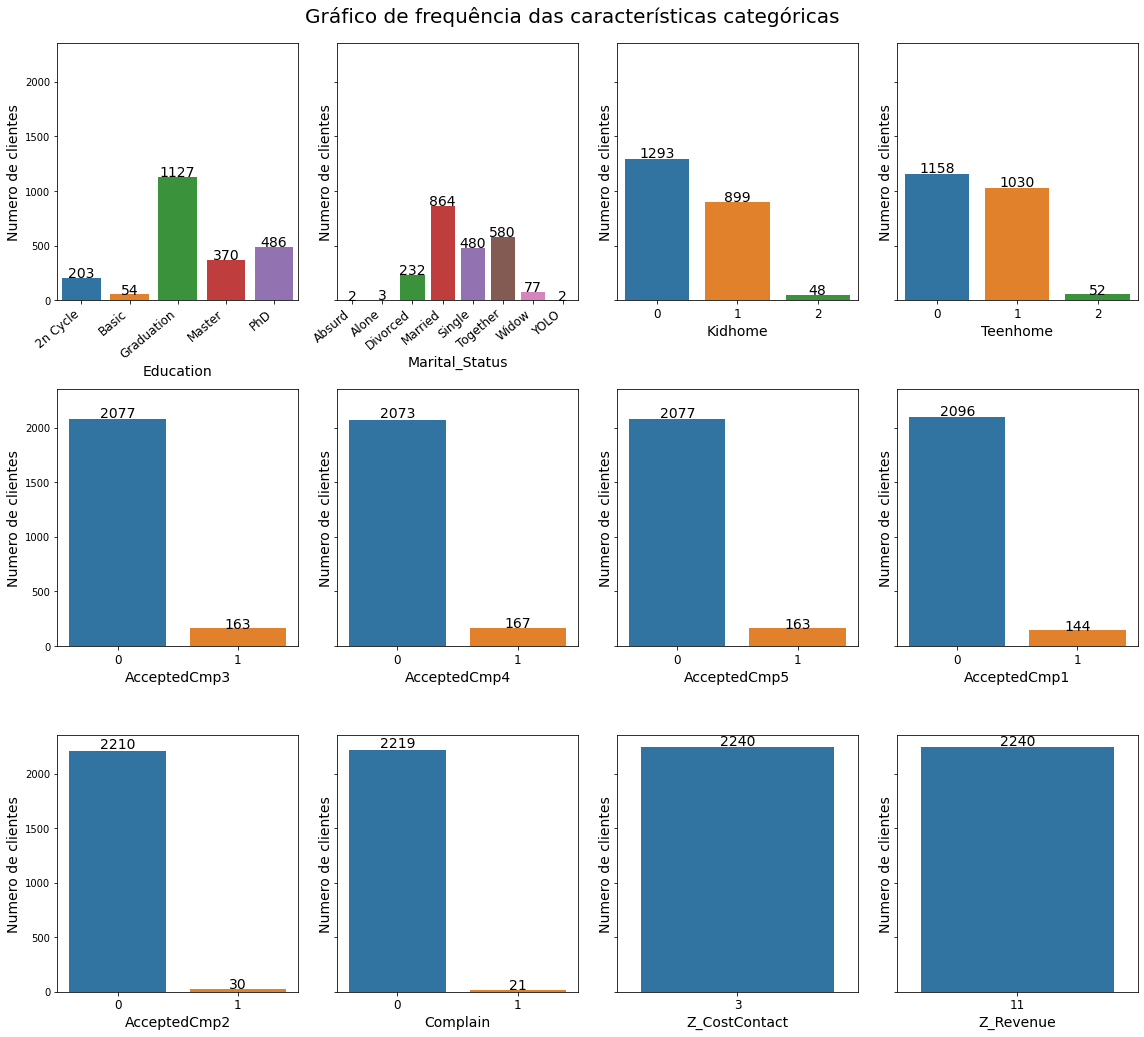

In [ ]:
# Frequencia das variaveis categoricas
categorical_col = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4',
                   'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

fig, ax=plt.subplots(3,4, figsize=(16,14), sharey=True)

for col, axis in zip(categorical_col, ax.ravel()):
    sns.countplot(x=col, data=df, ax=axis, order = np.sort(df[col].unique()))
    for i in axis.patches:    
        axis.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.01,
                s = f"{i.get_height()}", 
                ha = 'center', size = 14, rotation = 0, color = 'black')

    if (col == 'Marital_Status') or (col == 'Education'):
        axis.set_xticklabels(np.sort(df[col].unique()), rotation=40, ha="right", fontsize=12)
    else:
        axis.set_xticklabels(np.sort(df[col].unique()), fontsize=12)
    axis.set_ylabel('Numero de clientes', fontsize=14);
    axis.set_xlabel(col, fontsize=14);

fig.text(0.5, 1.01, 'Gráfico de frequência das características categóricas', ha = 'center', fontsize = 20)
plt.tight_layout()

* **Education**: A contagem de '2n Cycle' e de 'Basic' é menor, então irei combinalos em uma única categoria chamada 'Undergraduate'. E vou combinar 'Master' e 'PhD' como 'PostGraduate'.

* **Marital_Status**: A contagem de 'Absurd', 'Alone', 'Widow' e 'YOLO' é bem baixa, então vou mesclá-los com 'Sigle'.

* **Kidhome** e **Teenhome**: O número de clientes com 2 filhos ou adolescentes em casa é muito pequeno, então irei mesclá-los em clientes com 1 filho e renomear para 1+.

* **AcceptedCmp** e **Complain**: Os dados que trazem informação de qual campanha o cliente aceitou a oferta não são tão necessários, vou deixar apenas o `Response` que informa se cliente aceitou a oferta na última campanha. Na coluna `Complain` A contagem de 0 é muito pequena, isso parece não trazer informações relevantes, então é melhor remover essa colunas.

* **Z_CostContact** e **Z_Revenue**: Há apenas um único valor, então irei removê-los.

In [ ]:
# Educação
df['Education'] = df['Education'].replace({'2n Cycle':'Undergraduate', 'Basic': 'Undergraduate',
                        'Master': 'Post Graduate', 'PhD': 'Post Graduate'})

# Estado civil
df['Marital_Status'] = df['Marital_Status'].replace(dict.fromkeys(['Alone','Absurd','YOLO','Divorced', 'Widow'],'Single'))

# qntd de crianças
df['Kidhome'] = df['Kidhome'].replace({2:'1+',1:'1+'})

# qntd de adolecentes
df['Teenhome'] = df['Teenhome'].replace({2:'1+',1:'1+'})

# removendo colunas
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1', 'AcceptedCmp2','Complain'])

Irei substituir a coluna `Year_Birth` pela idade do cliente. Usando o ano atual, 2021 para calcular a idade (apesar de não saber de que ano são esses registros).

In [ ]:
df['Age'] = 2021 - df['Year_Birth']
df = df.drop(['Year_Birth'], axis=1)

## 4 - Tratamento de dados nulos

In [ ]:
df.shape

(2240, 20)

In [ ]:
# % de dados nulos em cada coluna
df.isnull().mean()*100


Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Response               0.000000
Age                    0.000000
dtype: float64

Apenas `Income` tem alguns valores ausentes, os valores ausentes são bem menores em comparação com o tamanho da base de dados, sendo um pouco maior que 1%, portanto, os valores ausentes serão removidos. 

In [ ]:
df = df.dropna()

## 5 - Tratamento de Ruidos

In [ ]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,52.179603
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,44.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,51.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,62.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,128.000000


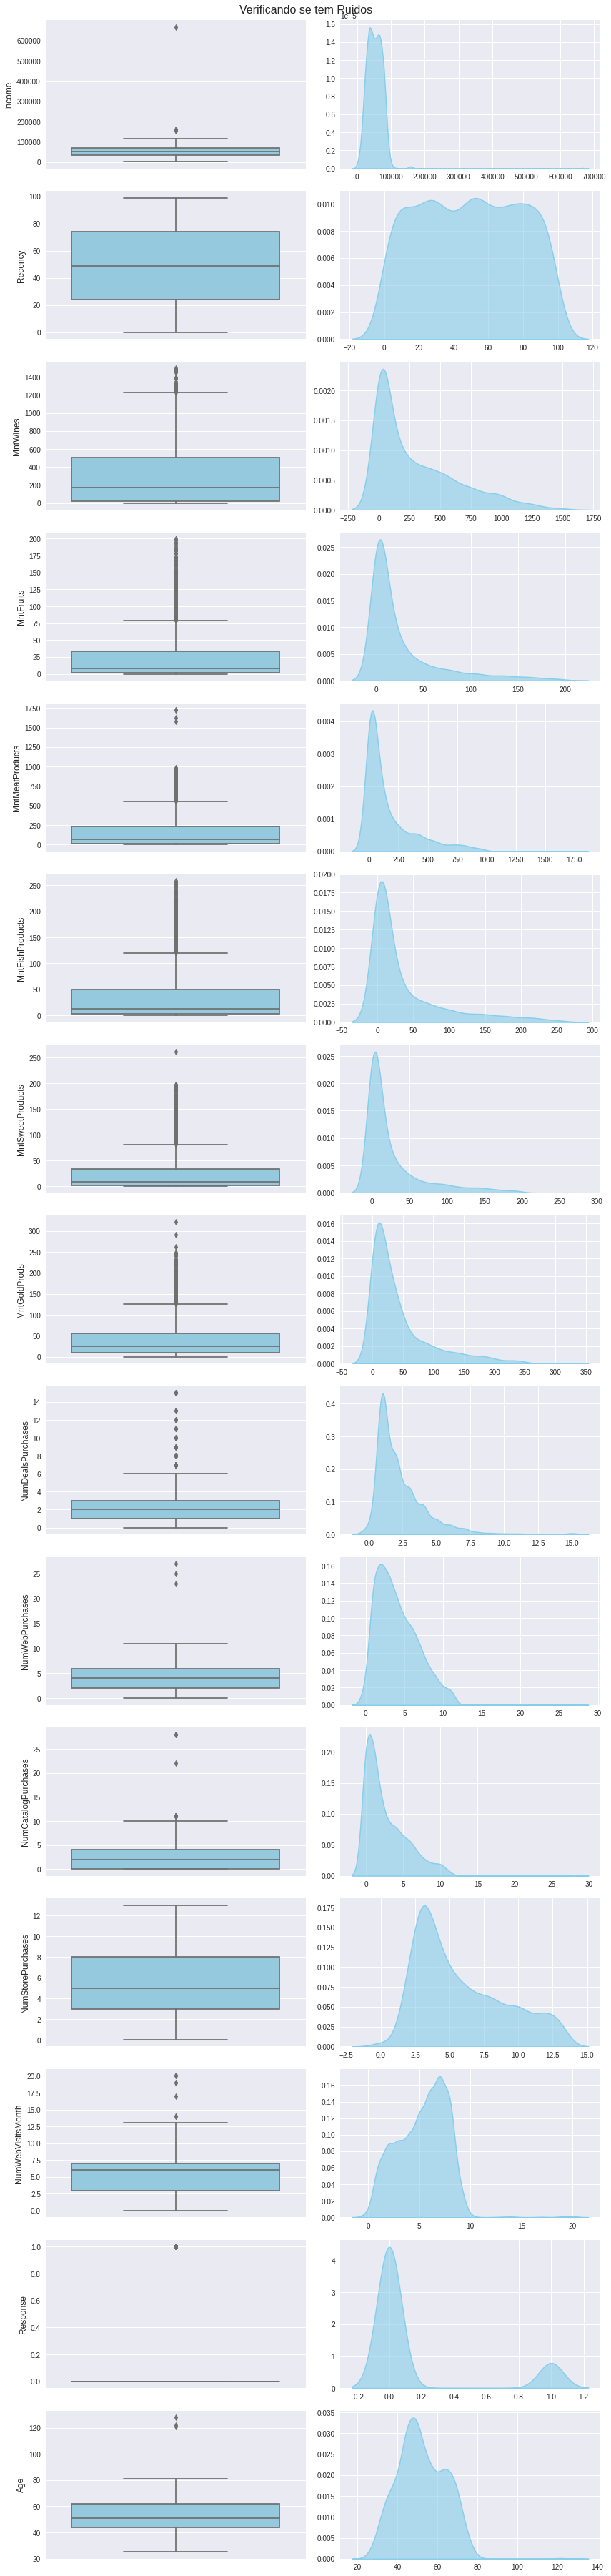

In [ ]:
numeric_var = df.select_dtypes(['int','float']).columns
plt.style.use('seaborn')
fig, axis = plt.subplots(len(numeric_var), 2, figsize = (12, 50))
for i, num_var in enumerate(numeric_var):
    
    # Verificando se tem outliers usando boxplot
    sns.boxplot(y = num_var, data = df, ax = axis[i][0], color = 'skyblue')
    
    # checando a distribuição os dados usando kdeplot
    sns.kdeplot(x = num_var, data = df, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Verificando se tem Ruidos', fontsize = 16, y = 1)
plt.tight_layout()

`Income`, `Age`, `MntMeatProducts` e `MntSweetProducts` têm alguns valores extremos, principalmente Income.

Existem clientes que gostam de solicitar tipos específicos de produtos, então `MntMeatProducts` e `MntSweetProducts` tem justificativas para terem valores altos. Mas para `Income` um dos valores é muito alto (> 600k), pode ser que tenha um cliente muito rico, talvez o Elon Musk faça a feira nesse mercado, mas vou removê-lo da análise, pois e um valor muito distante dos demais. A idade de um cliente não pode ser superior a 100, apesar de que usar 2021 para calcular a idade possa ter gerado esses outliers, não faz muito sentido já que grande parte das idades estão concentradas entre 20 e 80 anos.

Então os outliers de `Income` e `Age` serão excluidos e para diminuir o ruido de `MntMeatProducts` e `MntSweetProducts` os valores de cada atributo será divididos em faixas, de modo que cada faixa contenha aproximadamente a mesma quantidade de valores, para substituir essas faixas de valores pelos valores originais.


In [ ]:
df = df[(df['Income']<500000)]
df = df[(df['Age']<100)]

In [ ]:
# Redução de ruidos em MntMeatProducts
bins = pd.qcut(df['MntMeatProducts'], 10)
grupos = df['MntMeatProducts'].groupby(bins)
medias = grupos.mean()
novo_mean_radius = bins.apply(lambda x : int(medias[x]))
df['MntMeatProducts'] = novo_mean_radius

In [ ]:
# Redução de ruidos em MntSweetProducts
bins = pd.qcut(df['MntSweetProducts'], 5)
grupos = df['MntSweetProducts'].groupby(bins)
medias = grupos.mean()
novo_mean_radius = bins.apply(lambda x : int(medias[x]))
df['MntSweetProducts'] = novo_mean_radius

## 6 - Tratamento de Dados Errôneos

In [ ]:
df.shape

(2212, 20)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,708,172,97,88,3,8,10,4,7,1,64
1,Graduation,Single,46344.0,1+,1+,08-03-2014,38,11,1,4,2,0,6,2,1,1,2,5,0,67
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,139,111,27,42,1,8,2,10,4,0,56
3,Graduation,Together,26646.0,1+,0,10-02-2014,26,11,4,16,10,3,5,2,2,0,4,6,0,37
4,Post Graduate,Married,58293.0,1+,0,19-01-2014,94,173,43,139,46,27,15,5,5,3,6,5,0,40


In [ ]:
# Dados duplicados
df[df.duplicated(keep=False)].sort_values('Age')

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
696,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,9,2,0,4,1,1,0,2,6,0,26
995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,9,2,0,4,1,1,0,2,6,0,26
928,Graduation,Single,74293.0,0,0,04-05-2014,66,375,152,393,93,97,81,1,5,4,6,2,0,28
392,Graduation,Single,74293.0,0,0,04-05-2014,66,375,152,393,93,97,81,1,5,4,6,2,0,28
1578,Graduation,Married,34935.0,0,0,21-06-2013,71,34,4,52,3,9,20,1,2,1,4,7,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,52,150,9,28,2,4,1,6,7,0,75
1771,Post Graduate,Married,51012.0,0,0,18-04-2013,86,102,9,52,2,9,24,1,4,1,4,6,0,75
2236,Post Graduate,Together,64014.0,1+,1+,10-06-2014,56,406,0,26,0,0,8,7,8,2,5,7,0,75
894,Post Graduate,Single,48948.0,0,0,01-02-2013,53,437,8,233,160,97,42,2,7,10,5,6,1,78


In [ ]:
# Remoção de dados duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Verificação se tem dados errados
df['MntSweetProducts'].value_counts().sort_values()

3     335
9     366
27    394
97    404
0     528
Name: MntSweetProducts, dtype: int64

Não foi encontrado nenhum dado errado

## 7 - Transformação dos Dados

In [ ]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,708,172,97,88,3,8,10,4,7,1,64
1,Graduation,Single,46344.0,1+,1+,08-03-2014,38,11,1,4,2,0,6,2,1,1,2,5,0,67
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,139,111,27,42,1,8,2,10,4,0,56
3,Graduation,Together,26646.0,1+,0,10-02-2014,26,11,4,16,10,3,5,2,2,0,4,6,0,37
4,Post Graduate,Married,58293.0,1+,0,19-01-2014,94,173,43,139,46,27,15,5,5,3,6,5,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,4,3,3,3,1,0,0,3,4,0,35
2235,Graduation,Married,61223.0,0,1+,13-06-2013,46,709,43,233,42,97,247,2,9,3,4,5,0,54
2237,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,233,32,9,24,1,2,3,13,6,0,40
2238,Post Graduate,Together,69245.0,0,1+,24-01-2014,8,428,30,233,80,27,61,2,6,5,10,3,0,65


### Novas Colunas

`Total_gasto`: soma da quantidade de todos os produtos gasto nos ultimos 2 anos.

`total_num_compras`: numero de compras feito atraves de qualquer meio: site, catálogo ou direto na loja.

`faixa_etaria`: Faixa etaria do cliente

In [ ]:
# Nova coluna total gasto
df['Total_gasto'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'].astype("int") + df['MntFishProducts'] + df['MntSweetProducts'].astype("int") + df['MntGoldProds']

In [ ]:
# Nova coluna total de compras feitas
df['total_num_compras'] = df['NumStorePurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases']

In [ ]:
def get_idade(idade):
  if idade <= 18:
    return '0 - 18'
  elif idade <= 30:
    return '19 - 30'
  elif idade <= 45:
    return '31 - 45'
  elif idade <= 60:
    return '46 - 60'
  else:
    return "61 +"

In [ ]:
# Nova coluna faixa etaria
df['faixa_etaria'] = df['Age'].apply(get_idade)

In [ ]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_gasto,total_num_compras,faixa_etaria
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,708,172,97,88,3,8,10,4,7,1,64,1788,22,61 +
1,Graduation,Single,46344.0,1+,1+,08-03-2014,38,11,1,4,2,0,6,2,1,1,2,5,0,67,24,4,61 +
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,139,111,27,42,1,8,2,10,4,0,56,794,20,46 - 60
3,Graduation,Together,26646.0,1+,0,10-02-2014,26,11,4,16,10,3,5,2,2,0,4,6,0,37,49,6,31 - 45
4,Post Graduate,Married,58293.0,1+,0,19-01-2014,94,173,43,139,46,27,15,5,5,3,6,5,0,40,443,14,31 - 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,4,3,3,3,1,0,0,3,4,0,35,19,3,31 - 45
2235,Graduation,Married,61223.0,0,1+,13-06-2013,46,709,43,233,42,97,247,2,9,3,4,5,0,54,1371,16,46 - 60
2237,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,233,32,9,24,1,2,3,13,6,0,40,1254,18,31 - 45
2238,Post Graduate,Together,69245.0,0,1+,24-01-2014,8,428,30,233,80,27,61,2,6,5,10,3,0,65,859,21,61 +


### Salvando a base de dados

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign_pprocessado.csv",
                  header=True,
                  index=False,
                  sep=";")